<a href="https://colab.research.google.com/github/Jisang-hwang93/Machine-Learning-for-Study/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C%20%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%20%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[텐서플로와 머신러닝으로 시작하는 자연어처리]**
저자 : 전창욱, 최대균, 조충현 지음 / 출판사 : 위키북스

## **02. 자연어 처리 개발 준비**

In [79]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print("iris_dataset key : {}".format(iris_dataset.keys()))

iris_dataset key : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [80]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'],
                                                                    test_size=0.25, random_state=42)

In [81]:
print("shape of train_input : {}".format(train_input.shape))
print("shape of train_input : {}".format(test_input.shape))
print("shape of train_input : {}".format(train_label.shape))
print("shape of train_input : {}".format(test_label.shape))

shape of train_input : (112, 4)
shape of train_input : (38, 4)
shape of train_input : (112,)
shape of train_input : (38,)


### **02-1. 사이킷런을 이용한 지도학습**

In [82]:
# K-최근접 이웃 분류기
from sklearn.neighbors import KNeighborsClassifier

# k=1인 분류기 생성
knn = KNeighborsClassifier(n_neighbors = 1)

# 모델 학습
knn.fit(train_input, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
                     n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')

In [95]:
import numpy as np
# 라벨 예측
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

knn.predict(new_input)

array([1])

In [96]:
# 예측 결과값
predict_label = knn.predict(test_input)

print(predict_label)
print('test accuracy : {:.2f}'.format(np.mean(predict_label == test_label)))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
test accuracy : 1.00


### **02-2. 사이킷런을 이용한 비지도학습**

In [97]:
from sklearn.cluster import KMeans

# K가 3인 군집화 모델
k_means = KMeans(n_clusters=3)

# 모델 학습
k_means.fit(train_input)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
# 각 데이터의 라벨 확인
k_means.labels_

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 0], dtype=int32)

In [99]:
# 군집의 종 확인
print("0 cluster : ", train_label[k_means.labels_ == 0])
print("1 cluster : ", train_label[k_means.labels_ == 1])
print("2 cluster : ", train_label[k_means.labels_ == 2])

0 cluster :  [2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2]
1 cluster :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2 cluster :  [2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 2 1]


In [102]:
import numpy as np

# 라벨 예측
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

prediction = k_means.predict(new_input)
print(prediction)

[2]


In [103]:
predict_cluster = k_means.predict(test_input)
print(predict_cluster)

[2 1 0 2 2 1 2 0 2 2 0 1 1 1 1 2 0 2 2 0 1 2 1 0 0 0 0 0 1 1 1 1 2 1 1 2 2
 1]


In [104]:
# 예측 결과값 확인
np_arr = np.array(predict_cluster)
np_arr[np_arr==0], np_arr[np_arr==1], np_arr[np_arr==2] = 3, 4, 5
np_arr[np_arr==3] = 1
np_arr[np_arr==4] = 0
np_arr[np_arr==5] = 2
predict_label = np_arr.tolist()
print(predict_label)
print("test accuracy : {:.2f}".format(np.mean(predict_label == test_label)))

[2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0]
test accuracy : 0.45


### **02-3. 사이킷런을 이용한 특징 추출**

#### **02-3-1. CountVectorizer**
*   텍스트 데이터에서 횟수를 기준으로 특징을 추출하는 방법.
*   문장을 입력으로 받아 단어의 횟수를 측정해 벡터로 만듦.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# 예시 텍스트
text_data = ['나는 배가 고프다', '내일 점심 뭐 먹지', '내일 공부 해야겠다', '점심 먹고 공부해야지']

In [13]:
count_vectorizer = CountVectorizer()

# 단어 사전 생성
count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)

# 벡터화 결과 출력
sentence = [text_data[0]]
print(text_data[0], count_vectorizer.transform(sentence).toarray())

{'나는': 3, '배가': 7, '고프다': 0, '내일': 4, '점심': 8, '먹지': 6, '공부': 1, '해야겠다': 9, '먹고': 5, '공부해야지': 2}
나는 배가 고프다 [[1 0 0 1 0 0 0 1 0 0]]


#### **02-3-2. TfidfVectorizer**
TF-IDF라는 특정한 값을 이용해 텍스트 데이터의 특징을 추출.
*   TF(Term Frequency) : 단어가 하나의 데이터 안에서 등장하는 횟수.
*   DF(Document Frequency) : 특정 단어가 여러 데이터에서 등장하는 횟수.
*   IDF(Inverse Document Frequency) : 특정 단어가 다른 데이터에서 등장하지 않을수록 값이 커짐.
*   TF-IDF : TF와 IDF의 곱. 어떤 단어가 해당 데이터에서는 자주 등장하지만, 다른 데이터에는 많이 등장하지 않을수록 높은 값을 가짐.



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 예시 텍스트
text_data = ['나는 배가 고프다', '내일 점심 뭐 먹지', '내일 공부 해야겠다', '점심 먹고 공부해야지']

In [19]:
tfidf_vectorizer = TfidfVectorizer()

# 단어 사전 생성
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

# 벡터화 결과 출력
sentence = [text_data[0]]
print(text_data[0], "\n",tfidf_vectorizer.transform(sentence).toarray())

{'나는': 3, '배가': 7, '고프다': 0, '내일': 4, '점심': 8, '먹지': 6, '공부': 1, '해야겠다': 9, '먹고': 5, '공부해야지': 2}
나는 배가 고프다 
 [[0.57735027 0.         0.         0.57735027 0.         0.
  0.         0.57735027 0.         0.        ]]


## **03. 자연어 처리 개요**

### **03-1. 텍스트 유사도**

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.",
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

tfidf_vectorizer = TfidfVectorizer()

# 문장 벡터화
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)

# idf 값
idf= tfidf_vectorizer.idf_

# 각 수치에 대한 값 시각화
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


#### **03-1-1. 자카드 유사도**
두 문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방식.
*   두 집합의 교집합인 공통 단어의 개수를 합집합인 전체 단어의 수로 나눔.
*   0과 1 사이의 값. 1에 가까울수록 유사도가 높음.

In [14]:
import numpy as np

sent1 = "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다."
sent2 = "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다."

token1 = sent1.split()
token2 = sent2.split()

union_token = list(np.union1d(token1, token2))
intersect_token = list(np.intersect1d(token1, token2))

js = len(intersect_token) / len(union_token)

print("자카드 유사도 : {}".format(js))

자카드 유사도 : 0.2


#### **03-1-2. 코사인 유사도**
두 개의 벡터값에서 코사인 각도를 구하는 방법.
* -1에서 1사이의 값. 1에 가까울수록 유사함.
* 두 문장이 유사하면 같은 방향. 유사하지 않으면 직교로 표현.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# 첫 번째와 두 번째 문장 비교
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[0.17952266]])

#### **03-1-3. 유클리디언 유사도**
가장 기본적인 거리를 측정하는 유사도 공식
* n차원 공간에서 두 점 사이의 최단 거리를 구하는 접근법
* L2 거리(L2-Distance)라고도 함

In [16]:
from sklearn.metrics.pairwise import euclidean_distances

# 첫 번째와 두 번째 문장 비교
euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.28099753]])

In [20]:
import numpy as np

# L1 정규화 방법 적용
def l1_normalize(v):
    norm = np.sum(v)
    
    return v / norm

# L1 정규화를 거친 후 첫 번째와 두 번째 문장 비교
tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

#### **03-1-4. 맨하탄 유사도**
맨하탄 거리를 통해 유사도를 측정하는 방법
* 사각형 격자로 이뤄진 지도에서 출발점에서 도착점까지 가로지르지 않고 갈 수 있는 최단거리를 구하는 공식
* L1 거리(L1-Distance)라고도 함

In [23]:
from sklearn.metrics.pairwise import manhattan_distances

# L1 정규화를 거친 후 첫 번째와 두 번째 문장 비교
tfidf_norm_l1 = l1_normalize(tfidf_matrix)
manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.77865927]])

### **03-2. 데이터 이해하기**

In [26]:
from tensorflow.keras import utils

import os, re
import pandas as pd
import tensorflow as tf

# IMDB 데이터 가져오기
data_set = tf.keras.utils.get_file(
    fname='imdb.tar.gz',
    origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract=True
)

# 데이터프레임 변환 함수
def directory_data(directory):
    data = {}
    data['review'] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), 'r') as file:
            data['review'].append(file.read())

    return pd.DataFrame.from_dict(data)

# 라벨링
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0

    return pd.concat([pos_df, neg_df])

84131840/84125825 [==============================] - 1s 0us/step


In [27]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))

train_df.head()

,review,sentiment
0,THE DEVIL'S PLAYTHING is my second attempt at ...,1
1,These two men went thru hell and beyond and ha...,1
2,I've been impressed with Chavez's stance again...,1
3,Loved Joan. Great performance. What isn't she ...,1
4,"""Most of us at least inhabit two worlds , the ...",1


In [30]:
reviews = list(train_df['review'])

# 문자열 문장 리스트 토크나이징
tokenized_reviews = [r.split() for r in reviews]

# 토크나이징된 리스트의 길이 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토큰들을 붙여서 음절의 길이 저장
review_len_by_eumjeol = [len(s.replace(" ", "")) for s in reviews]

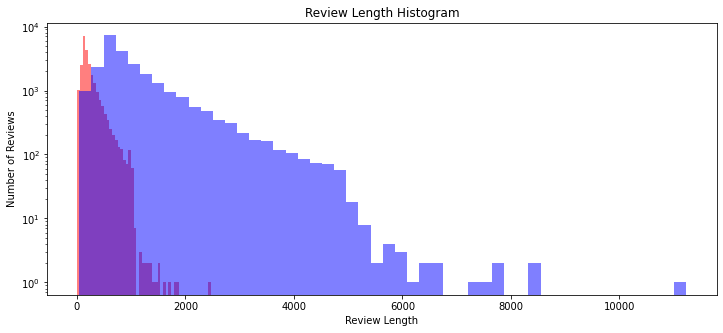

In [31]:
import matplotlib.pyplot as plt

# 데이터 길이에 대한 히스토그램 확인
plt.figure(figsize=(12, 5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

plt.show()

In [34]:
import numpy as np

# 데이터 분포에 대한 통계치
print("문장 최대 길이 : {}".format(np.max(review_len_by_token)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token)))
print("문장 평균 길이 : {:.2f}".format(np.mean(review_len_by_token)))
print("문장 길이 표준편차 : {:.2f}".format(np.std(review_len_by_token)))
print("문장 중간 길이 : {}".format(np.median(review_len_by_token)))
print("제 1사분위 길이 : {}".format(np.percentile(review_len_by_token, 25)))
print("제 3사분위 길이 : {}".format(np.percentile(review_len_by_token, 75)))

문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.79
문장 길이 표준편차 : 173.73
문장 중간 길이 : 174.0
제 1사분위 길이 : 127.0
제 3사분위 길이 : 284.0


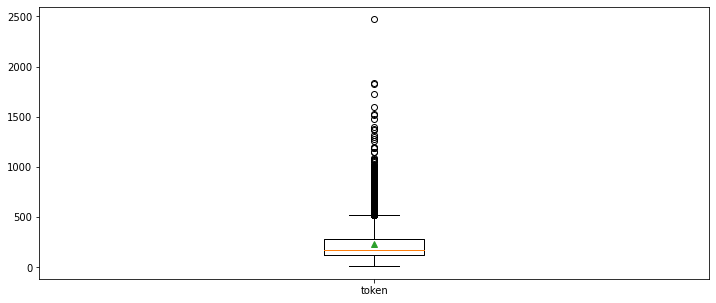

In [35]:
# 박스 플롯을 이용해 문장 내 단어수 확인
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)

plt.show()

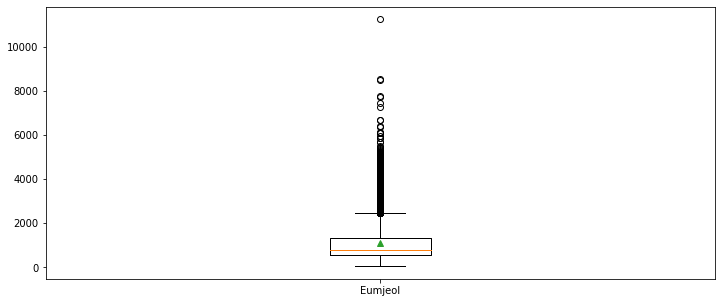

In [37]:
# 박스 플롯을 이용해 문장 내 알파벳 수 확인
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_eumjeol], labels=['Eumjeol'], showmeans=True)

plt.show()

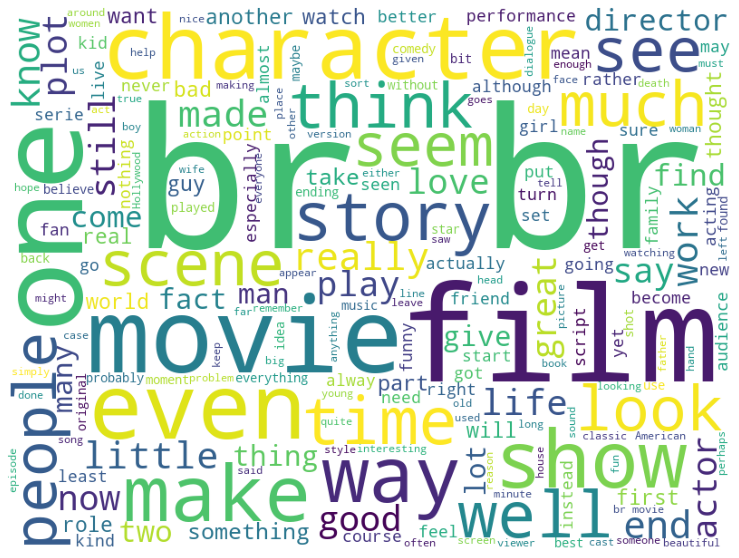

In [38]:
# 워드클라우드로 시각화
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords = STOPWORDS, background_color='white',
                      width=800, height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

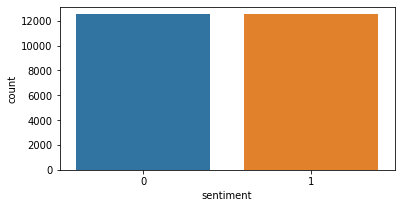

In [41]:
# 긍정, 부정 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])

plt.show()